# 0. Data and Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import cv2
import random as rn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
#setting up path for data
train_path = Path('drive/Shared drives/STA221 - Final Project/datash/train/train')
test_path = Path('drive/Shared drives/STA221 - Final Project/datash/test/test')
normal_data_path = train_path / 'NORMAL'
covid_data_path = train_path / 'COVID19 AND PNEUMONIA'

In [4]:
#get the counts of each type of training data
#https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python
list1 = os.listdir(normal_data_path)
num_normal = len(list1)
print ('Number of normal data in training set:',num_normal)
list2 = os.listdir(covid_data_path)
num_sick = len(list2)
print ('Number of covid data intraining set:',num_sick)

Number of normal data in training set: 1341
Number of covid data intraining set: 3925


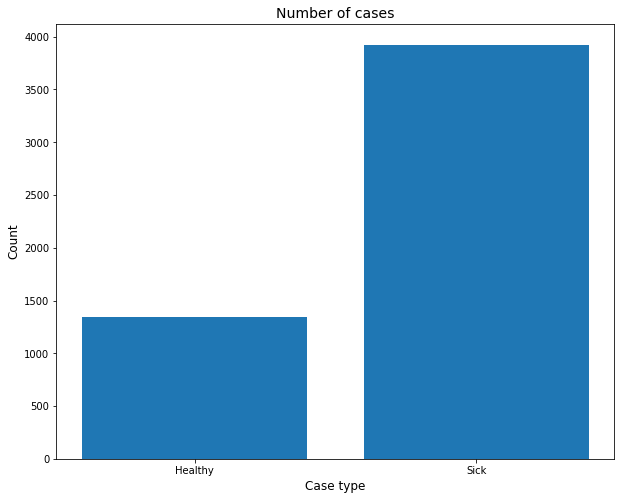

In [0]:
group_names=['Healthy', 'Sick']
cases_count=[num_normal, num_sick]
plt.figure(figsize=(10,8))
pyplot.bar(group_names, cases_count)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The histogram of the available data is as shown.

In [5]:
#resize everything to 250,250
all_data=[]
all_labels=[]
for img in tqdm(os.listdir(normal_data_path)):
    path = os.path.join(normal_data_path,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (250,250)) # try different size here
    img = img.astype(np.float32)/255.
    all_data.append(np.array(img))
    #create labels list, 0 for normal
    all_labels.append(str(0))

100%|██████████| 1341/1341 [13:11<00:00,  1.69it/s]


In [6]:
#resize eveything
for img in tqdm(os.listdir(covid_data_path)):
    path = os.path.join(covid_data_path,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (250,250)) # try different size here
    img = img.astype(np.float32)/255.
    all_data.append(np.array(img))
    #add to labels list, 1 for covid
    all_labels.append(str(1))

100%|██████████| 3925/3925 [21:16<00:00,  3.07it/s]


Two cells of code executed above are to resize the image data to 250$\times$250 pixels. Resizing to smaller scales were also performed which results are shown in the report, however, for the convinience of performance, the only resizing presented here is the one that the models worked with best.

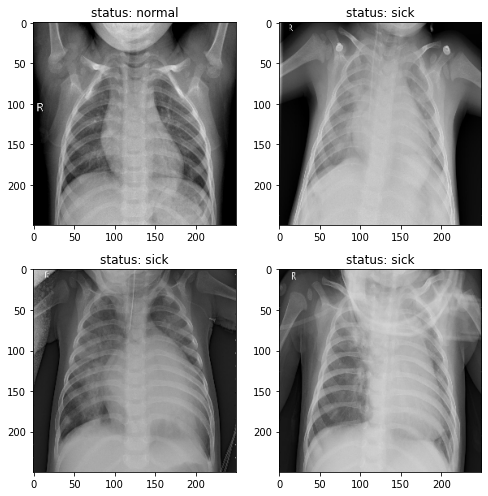

In [0]:
#print some random data
fig,ax=plt.subplots(2,2)
fig.set_size_inches(7,7)
for i in range(2):
    for j in range (2):
        l=rn.randint(0,len(all_labels))
        ax[i,j].imshow(all_data[l])
        if all_labels[l]=='0':stat='normal'
        else:stat='sick'
        ax[i,j].set_title('status: '+ stat)      
plt.tight_layout()

Some of the data is randomly printed, to check everything and visually compare them before training the model.

In [0]:
all_labels = np.array(all_labels)
all_data = np.array(all_data)

In [0]:
#get training and test sets (use .25 as test size)
x_train,x_test,y_train,y_test=train_test_split(all_data,all_labels,test_size=0.25,random_state=99)

In [0]:
#data augmentation?
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

Data Augmentation with the parameters mentioned in the report, to prevetn overfitting.

In [10]:
test_data=[]
#resize the unknown test data
for img in tqdm(os.listdir(test_path)):
    path = os.path.join(test_path,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (250,250))
    img = img.astype(np.float32)/255.
    test_data.append(np.array(img))

100%|██████████| 690/690 [04:06<00:00,  2.79it/s]


In [11]:
names=[]
for img in tqdm(os.listdir(test_path)):
  names.append(img)

100%|██████████| 690/690 [00:00<00:00, 1212937.87it/s]


In [0]:
import pandas as pd
names=pd.DataFrame(names)
#ready the file for final submissions on Kaggle

# ResNet50
92.27%


In [13]:
pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=20ba95fb8731751e98ff24bec5bb4169068ba681391df4ce19dffe3d57b8c2ce
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet


In [0]:
import keras_resnet.models

In [19]:
from tensorflow.keras import layers
from keras.layers import *
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
import keras

CLASS_COUNT = 2

#using ResNet as the base model
base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(250, 250, 3), 
    pooling='avg',
)
#base_model.trainable = False
model_resnet50 = Sequential([
  base_model,
  Dense(CLASS_COUNT, activation='softmax'),
])
#add the optimizer and loss functions
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_resnet50.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model_resnet50.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [21]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

history = model_resnet50.fit(datagen.flow(x_train,train_labels, batch_size = 32) ,epochs = 15 , validation_data = (x_test,test_labels))

Epoch 1/15
124/124 [==============================] - 60s 485ms/step - loss: 0.0308 - accuracy: 0.9884 - val_loss: 4.8891 - val_accuracy: 0.7350
Epoch 2/15
124/124 [==============================] - 59s 476ms/step - loss: 0.0401 - accuracy: 0.9846 - val_loss: 3.9294 - val_accuracy: 0.7350
Epoch 3/15
124/124 [==============================] - 59s 475ms/step - loss: 0.0389 - accuracy: 0.9861 - val_loss: 1.8967 - val_accuracy: 0.7388
Epoch 4/15
124/124 [==============================] - 59s 475ms/step - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0714 - val_accuracy: 0.9742
Epoch 5/15
124/124 [==============================] - 59s 475ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0572 - val_accuracy: 0.9810
Epoch 6/15
124/124 [==============================] - 59s 476ms/step - loss: 0.0318 - accuracy: 0.9891 - val_loss: 0.1569 - val_accuracy: 0.9393
Epoch 7/15
124/124 [==============================] - 59s 476ms/step - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.0518 - val_ac

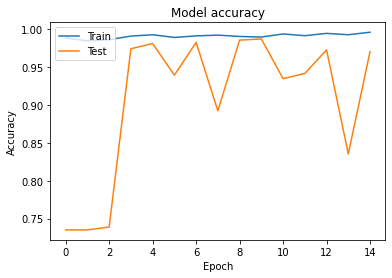

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

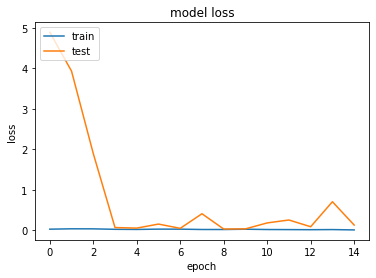

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#explain interpretation

<Figure size 432x288 with 0 Axes>

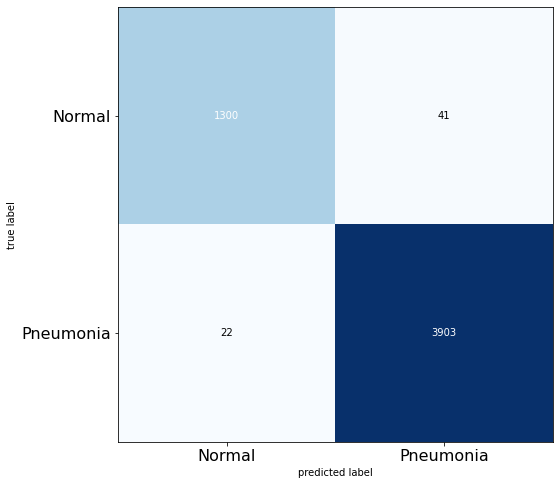

In [0]:
# All Training Set Confusion Matrix
predictions = model_resnet50.predict_classes(all_data)
predictions = predictions.reshape(1,-1)[0]
predictions = np.array(list(map(str,predictions)))
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(all_labels.astype(int), predictions.astype(int))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

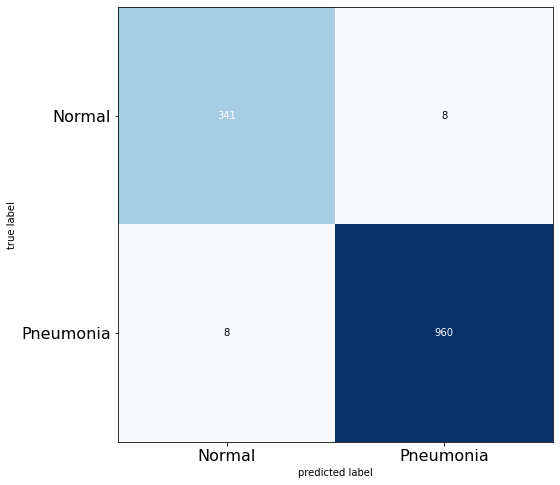

In [0]:
# Validation Set Confusion Matrix
predictions = model_resnet50.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions = np.array(list(map(str,predictions)))
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test.astype(int), predictions.astype(int))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [0]:
test_data = np.array(test_data)
predictions = model_resnet50.predict_classes(test_data)
predictions = predictions.reshape(1,-1)[0]
test_labels = np.array(list(map(str,predictions)))
names['labels']=test_labels

In [0]:
import pandas as pd 
pd.DataFrame(test_labels).to_csv("/content/drive/My Drive/ResNet50_Label.csv")
pd.DataFrame(names).to_csv("/content/drive/My Drive/ResNet50_Label.csv")

# VGG16
83.82%

In [0]:
import tensorflow as tf
import numpy as np
import keras
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(250,250,3), include_top=False,weights='imagenet')
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2,activation='softmax')
model_vgg16 = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])


In [0]:
model_vgg16.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [0]:
model_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
#from keras.utils import to_categorical
#train_labels = to_categorical(y_train)
#test_labels = to_categorical(y_test)

In [0]:
history_vgg16 = model_vgg16.fit(x_train,train_labels,
                    epochs=20, 
                    #steps_per_epoch=2,
                    #validation_steps=2,
                    validation_data=(x_test,test_labels))

Epoch 1/20
124/124 [==============================] - 17s 138ms/step - loss: 0.4608 - accuracy: 0.7660 - val_loss: 0.3751 - val_accuracy: 0.8459
Epoch 2/20
124/124 [==============================] - 16s 130ms/step - loss: 0.3205 - accuracy: 0.8658 - val_loss: 0.2896 - val_accuracy: 0.8762
Epoch 3/20
124/124 [==============================] - 16s 130ms/step - loss: 0.2637 - accuracy: 0.9038 - val_loss: 0.2469 - val_accuracy: 0.9142
Epoch 4/20
124/124 [==============================] - 16s 130ms/step - loss: 0.2347 - accuracy: 0.9167 - val_loss: 0.2222 - val_accuracy: 0.9263
Epoch 5/20
124/124 [==============================] - 16s 130ms/step - loss: 0.2155 - accuracy: 0.9220 - val_loss: 0.2034 - val_accuracy: 0.9415
Epoch 6/20
124/124 [==============================] - 16s 130ms/step - loss: 0.2026 - accuracy: 0.9281 - val_loss: 0.1927 - val_accuracy: 0.9362
Epoch 7/20
124/124 [==============================] - 16s 130ms/step - loss: 0.1913 - accuracy: 0.9309 - val_loss: 0.1800 - val_ac

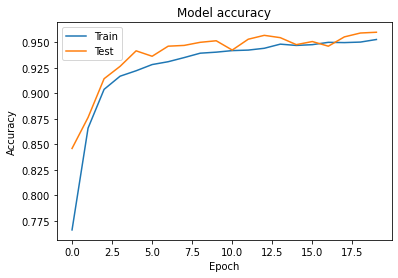

In [0]:
# Plot training & validation accuracy values
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<Figure size 432x288 with 0 Axes>

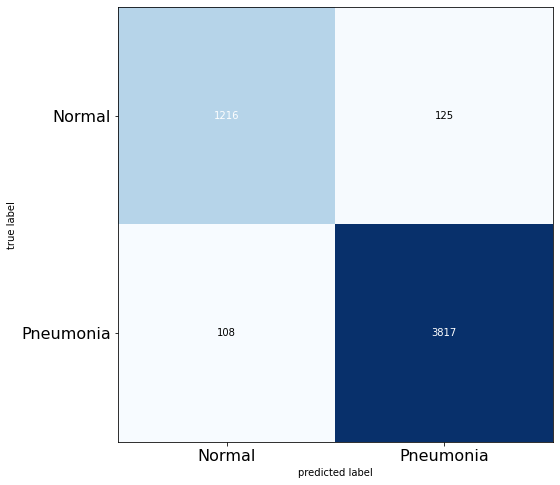

In [0]:
# All Training Set Confusion Matrix
predictions_vgg16 = model_vgg16.predict_classes(all_data)
predictions_vgg16 = predictions_vgg16.reshape(1,-1)[0]
predictions_vgg16 = np.array(list(map(str,predictions_vgg16)))
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm_vgg16  = confusion_matrix(all_labels.astype(int), predictions_vgg16.astype(int))
plt.figure()
plot_confusion_matrix(cm_vgg16,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

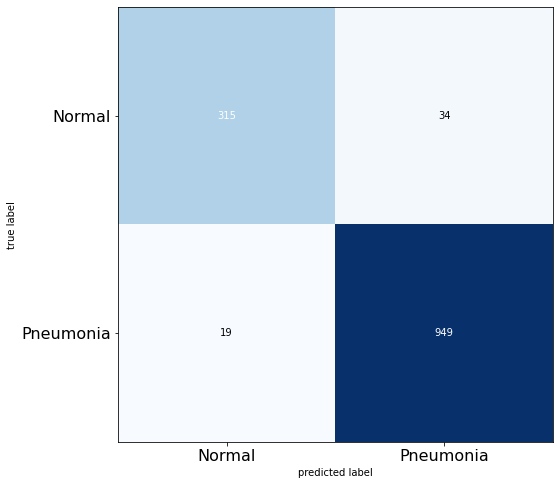

In [0]:
# Validation Set Confusion Matrix
predictions_vgg16_val = model_vgg16.predict_classes(x_test)
predictions_vgg16_val = predictions_vgg16_val.reshape(1,-1)[0]
predictions_vgg16_val = np.array(list(map(str,predictions_vgg16_val)))
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm_vgg16_val  = confusion_matrix(y_test.astype(int), predictions_vgg16_val.astype(int))
plt.figure()
plot_confusion_matrix(cm_vgg16_val,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [0]:
test_data = np.array(test_data)
predictions = model_vgg16.predict_classes(test_data)
predictions = predictions.reshape(1,-1)[0]
test_labels = np.array(list(map(str,predictions)))
names['labels']=test_labels

In [0]:
import pandas as pd 
pd.DataFrame(test_labels).to_csv("/content/drive/My Drive/VGG16_Label.csv")
pd.DataFrame(names).to_csv("/content/drive/My Drive/VGG16_Label.csv")

# AlexNet
82.61%

In [0]:

# Importing dependency
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(99)

# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(250,250,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(250*250*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 60, 60, 96)        34944     
_________________________________________________________________
activation_469 (Activation)  (None, 60, 60, 96)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 96)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 30, 30, 96)        384       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 256)       2973952   
_________________________________________________________________
activation_470 (Activation)  (None, 20, 20, 256)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 10, 10, 256)     

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

history = model.fit(datagen.flow(x_train,train_labels, batch_size = 32) ,epochs = 15 , validation_data = (x_test,test_labels))

Epoch 1/15
124/124 [==============================] - 43s 347ms/step - loss: 0.1598 - accuracy: 0.9400 - val_loss: 1.9865 - val_accuracy: 0.3941
Epoch 2/15
124/124 [==============================] - 42s 342ms/step - loss: 0.1673 - accuracy: 0.9359 - val_loss: 0.8064 - val_accuracy: 0.7684
Epoch 3/15
124/124 [==============================] - 42s 341ms/step - loss: 0.1411 - accuracy: 0.9521 - val_loss: 0.3582 - val_accuracy: 0.8337
Epoch 4/15
124/124 [==============================] - 42s 341ms/step - loss: 0.1526 - accuracy: 0.9438 - val_loss: 0.1620 - val_accuracy: 0.9438
Epoch 5/15
124/124 [==============================] - 42s 341ms/step - loss: 0.1466 - accuracy: 0.9445 - val_loss: 3.8390 - val_accuracy: 0.3948
Epoch 6/15
124/124 [==============================] - 42s 338ms/step - loss: 0.1366 - accuracy: 0.9486 - val_loss: 0.2995 - val_accuracy: 0.8216
Epoch 7/15
124/124 [==============================] - 42s 342ms/step - loss: 0.1384 - accuracy: 0.9544 - val_loss: 1.4482 - val_ac

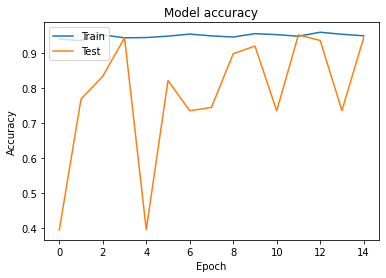

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<Figure size 432x288 with 0 Axes>

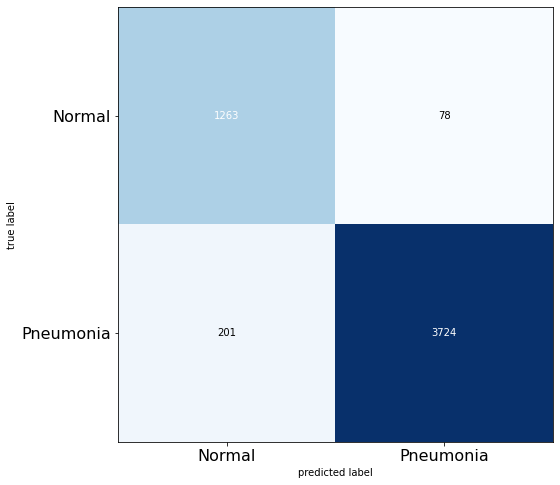

In [0]:
# All Training Set Confusion Matrix
predictions = model.predict_classes(all_data)
predictions = predictions.reshape(1,-1)[0]
predictions = np.array(list(map(str,predictions)))
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(all_labels.astype(int), predictions.astype(int))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

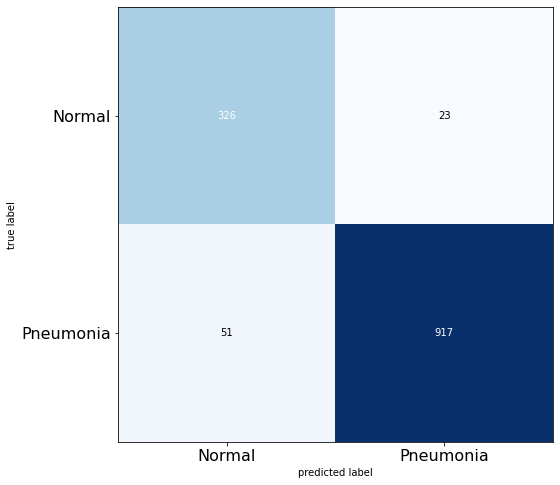

In [0]:
# Validation Set Confusion Matrix
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions = np.array(list(map(str,predictions)))
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test.astype(int), predictions.astype(int))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [0]:
test_data = np.array(test_data)
predictions = model.predict_classes(test_data)
predictions = predictions.reshape(1,-1)[0]
test_labels = np.array(list(map(str,predictions)))
names['labels']=test_labels

In [0]:
import pandas as pd 
pd.DataFrame(test_labels).to_csv("/content/drive/My Drive/AlexNet_Label.csv")
pd.DataFrame(names).to_csv("/content/drive/My Drive/AlexNet_Label.csv")

# CNN1
83.82%

In [0]:
#build the model step by step
def build_model():
    input_img = Input(shape=(250,250,3), name='ImageInput')
    x = Conv2D(32, (3,3), activation='relu' , padding='same', name='Conv1_1')(input_img)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = Conv2D(64, (3,3), activation='relu', padding='same',  name='Conv2_1')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)
    
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = MaxPooling2D((2,2), name='pool3_1')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(64, activation='relu', name='fc1')(x)
    x = Dropout(0.5, name='dropout2')(x)
    #try sigmoid function for classification
    x = Dense(1, activation='sigmoid', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [0]:
CNN1=build_model()
CNN1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 250, 250, 3)       0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 250, 250, 32)      896       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 125, 125, 32)      0         
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 125, 125, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 62, 62, 64)        0         
_________________________________________________________________
Conv3_1 (Conv2D)             (None, 62, 62, 128)       73856     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 62, 62, 128)       512 

In [0]:
epochs = 20
batch_size = 60
l_r = Adam(lr=0.0001)
CNN1.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=l_r)

In [0]:
# Fit the model
History = CNN1.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
65/65 [==============================] - 55s 846ms/step - loss: 0.3787 - accuracy: 0.8205 - val_loss: 0.6261 - val_accuracy: 0.8861
Epoch 2/20
65/65 [==============================] - 53s 820ms/step - loss: 0.2858 - accuracy: 0.8673 - val_loss: 0.6383 - val_accuracy: 0.8519
Epoch 3/20
65/65 [==============================] - 53s 812ms/step - loss: 0.2582 - accuracy: 0.8884 - val_loss: 0.4708 - val_accuracy: 0.9279
Epoch 4/20
65/65 [==============================] - 52s 801ms/step - loss: 0.2523 - accuracy: 0.8897 - val_loss: 0.4637 - val_accuracy: 0.9324
Epoch 5/20
65/65 [==============================] - 51s 792ms/step - loss: 0.2298 - accuracy: 0.9025 - val_loss: 0.3180 - val_accuracy: 0.8876
Epoch 6/20
65/65 [==============================] - 51s 792ms/step - loss: 0.2260 - accuracy: 0.9064 - val_loss: 0.3650 - val_accuracy: 0.9431
Epoch 7/20
65/65 [==============================] - 52s 794ms/step - loss: 0.2109 - accuracy: 0.9067 - val_loss: 0.2752 - val_accuracy: 0.8231

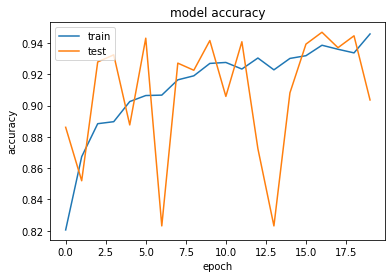

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

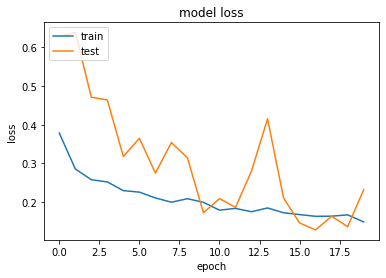

In [0]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#explain interpretation

<Figure size 432x288 with 0 Axes>

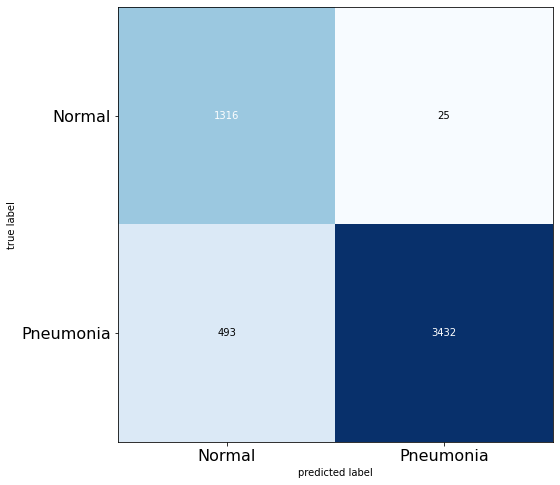

In [0]:
pred=CNN1.predict(all_data)
pred_labels = np.where(pred>0.5, 1, 0)
cm  = confusion_matrix(all_labels.astype(int), pred_labels.astype(int))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [0]:
training_loss, training_score = CNN1.evaluate(all_data, all_labels, batch_size=60)
print("Loss on training set: ", training_loss)
print("Accuracy on training set: ", training_score)

5266/5266 [==============================] - 11s 2ms/step
Loss on training set:  0.23369165180845944
Accuracy on training set:  0.9016331434249878


In [0]:
test_data=np.array(test_data)
test_pred = CNN1.predict(test_data, batch_size=16)
test_labels = np.where(test_pred>0.5, 1, 0)
names['labels']=test_labels
#pd.DataFrame(test_labels).to_csv("/content/drive/My Drive/CNN1_label.csv")
pd.DataFrame(names).to_csv("/content/drive/My Drive/CNN1_label.csv")

# CNN2
83.82%

In [0]:
#build the model step by step
def build_model():
    input_img = Input(shape=(250,250,3), name='ImageInput')
    x = Conv2D(128, (3,3), activation='relu' , padding='same', name='Conv1_1')(input_img)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = Conv2D(512, (3,3), activation='relu', padding='same',  name='Conv2_1')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(128, activation='relu', name='fc1')(x)
    x = Dropout(0.5, name='dropout1')(x)
    x = Dense(64, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    #try sigmoid function for classification
    x = Dense(1, activation='sigmoid', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [0]:
CNN2=build_model()
CNN2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 250, 250, 3)       0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 250, 250, 128)     3584      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 125, 125, 128)     0         
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 125, 125, 512)     590336    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 62, 62, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 1968128)           0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               2519

In [0]:
epochs = 20
batch_size = 60
l_r = Adam(lr=0.0001)
CNN2.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=l_r)

In [0]:
# Fit the model
History = CNN2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
65/65 [==============================] - 50s 769ms/step - loss: 0.7192 - accuracy: 0.7213 - val_loss: 0.4810 - val_accuracy: 0.7350
Epoch 2/20
65/65 [==============================] - 47s 724ms/step - loss: 0.3833 - accuracy: 0.7501 - val_loss: 0.3144 - val_accuracy: 0.7350
Epoch 3/20
65/65 [==============================] - 46s 714ms/step - loss: 0.3481 - accuracy: 0.8102 - val_loss: 0.3214 - val_accuracy: 0.8990
Epoch 4/20
65/65 [==============================] - 46s 712ms/step - loss: 0.3409 - accuracy: 0.8557 - val_loss: 0.3171 - val_accuracy: 0.8770
Epoch 5/20
65/65 [==============================] - 47s 716ms/step - loss: 0.3418 - accuracy: 0.8573 - val_loss: 0.4050 - val_accuracy: 0.8519
Epoch 6/20
65/65 [==============================] - 46s 715ms/step - loss: 0.3380 - accuracy: 0.8552 - val_loss: 0.3152 - val_accuracy: 0.8983
Epoch 7/20
65/65 [==============================] - 46s 711ms/step - loss: 0.3248 - accuracy: 0.8681 - val_loss: 0.2984 - val_accuracy: 0.8443

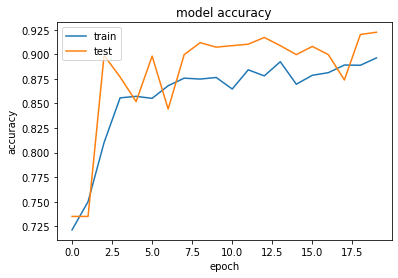

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

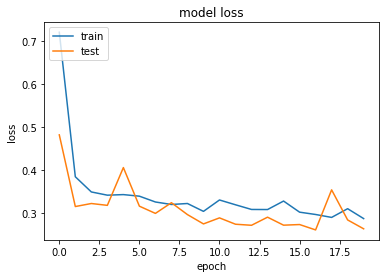

In [0]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#explain interpretation

<Figure size 432x288 with 0 Axes>

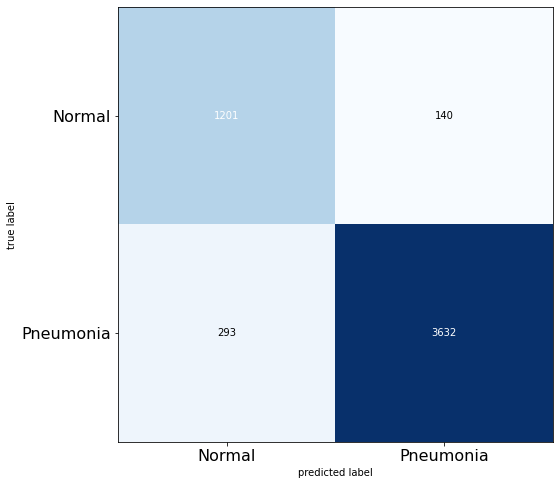

In [0]:
pred=CNN2.predict(all_data)
pred_labels = np.where(pred>0.5, 1, 0)
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(all_labels.astype(int), pred_labels.astype(int))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [0]:
training_loss, training_score = CNN2.evaluate(all_data, all_labels, batch_size=60)
print("Loss on training set: ", training_loss)
print("Accuracy on training set: ", training_score)

5266/5266 [==============================] - 15s 3ms/step
Loss on training set:  0.2638004884856693
Accuracy on training set:  0.9177743792533875


In [0]:
test_data=np.array(test_data)
test_pred = CNN2.predict(test_data, batch_size=16)
test_labels = np.where(test_pred>0.5, 1, 0)
names['labels']=test_labels
#pd.DataFrame(test_labels).to_csv("/content/drive/My Drive/CNN2_label.csv")
pd.DataFrame(names).to_csv("/content/drive/My Drive/CNN2_label.csv")

# CNN3
86.47%

In [0]:
#build the model step by step
def build_model():
    input_img = Input(shape=(250,250,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu' , padding='same', name='Conv1_1')(input_img)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = Conv2D(64, (3,3), activation='relu', padding='same',  name='Conv2_1')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)

    x = Conv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)

    
    x = Flatten(name='flatten')(x)
    x = Dense(128, activation='relu', name='fc1')(x)
    x = Dropout(0.5, name='dropout1')(x)
    x = Dense(64, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    #try sigmoid function for classification
    x = Dense(1, activation='sigmoid', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [0]:
CNN3=build_model()
CNN3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 250, 250, 3)       0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 250, 250, 64)      1792      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 125, 125, 64)      0         
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 125, 125, 64)      36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 62, 62, 64)        0         
_________________________________________________________________
Conv3_1 (Conv2D)             (None, 62, 62, 256)       147712    
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 31, 31, 256)       0   

In [0]:
epochs = 45
batch_size = 60
l_r = Adam(lr=0.0001)
CNN3.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=l_r)

In [0]:
# Fit the model
History = CNN3.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/45
65/65 [==============================] - 59s 908ms/step - loss: 0.5548 - accuracy: 0.7354 - val_loss: 0.4233 - val_accuracy: 0.8056
Epoch 2/45
65/65 [==============================] - 56s 861ms/step - loss: 0.3458 - accuracy: 0.8331 - val_loss: 0.2815 - val_accuracy: 0.8914
Epoch 3/45
65/65 [==============================] - 56s 860ms/step - loss: 0.3221 - accuracy: 0.8390 - val_loss: 0.2821 - val_accuracy: 0.8671
Epoch 4/45
65/65 [==============================] - 56s 857ms/step - loss: 0.3049 - accuracy: 0.8439 - val_loss: 0.2425 - val_accuracy: 0.8960
Epoch 5/45
65/65 [==============================] - 55s 854ms/step - loss: 0.3077 - accuracy: 0.8542 - val_loss: 0.3010 - val_accuracy: 0.8656
Epoch 6/45
65/65 [==============================] - 55s 847ms/step - loss: 0.2982 - accuracy: 0.8804 - val_loss: 0.3162 - val_accuracy: 0.8664
Epoch 7/45
65/65 [==============================] - 54s 828ms/step - loss: 0.2845 - accuracy: 0.8804 - val_loss: 0.2232 - val_accuracy: 0.9157

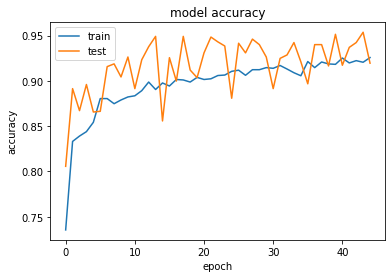

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

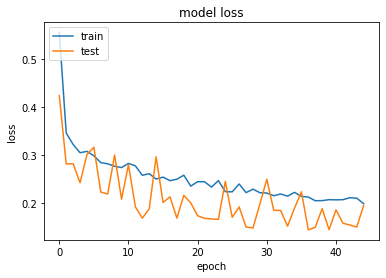

In [0]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#explain interpretation

<Figure size 432x288 with 0 Axes>

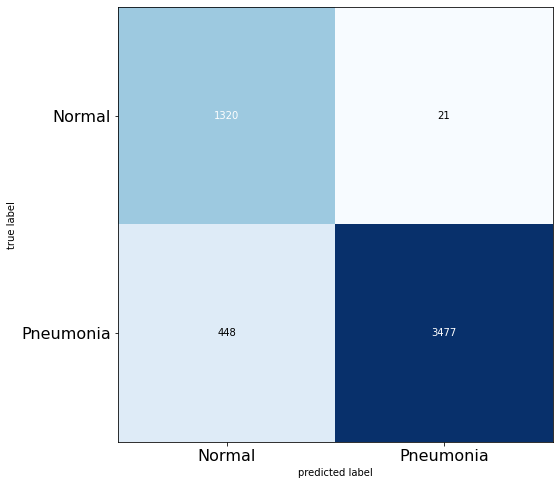

In [0]:
pred=CNN3.predict(all_data)
pred_labels = np.where(pred>0.5, 1, 0)
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(all_labels.astype(int), pred_labels.astype(int))
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [0]:
training_loss, training_score = CNN3.evaluate(all_data, all_labels, batch_size=60)
print("Loss on training set: ", training_loss)
print("Accuracy on training set: ", training_score)

5266/5266 [==============================] - 15s 3ms/step
Loss on training set:  0.2042059257224717
Accuracy on training set:  0.9109380841255188


In [0]:
test_data=np.array(test_data)
test_pred = CNN3.predict(test_data, batch_size=16)
test_labels = np.where(test_pred>0.5, 1, 0)
names['labels']=test_labels
#pd.DataFrame(test_labels).to_csv("/content/drive/My Drive/CNN3_label.csv")
pd.DataFrame(names).to_csv("/content/drive/My Drive/CNN3_label.csv")